# NexaStore — : Nettoyage et Qualité des Données

**Projet :** NexaStore - Leader mondial du e-commerce  
**Objectif :** Assurer que le jeu de données soit complet, unique, valide et cohérent  
**Dataset :** Nexa_Store_Dataset_0.2.csv   
**Date :** Novembre 2025  

## 0. Préparation & Imports

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Imports terminés")
print("Configuration Pandas appliquée")

Imports terminés
Configuration Pandas appliquée


In [43]:
# Charger le dataset:
df = pd.read_csv('Nexa_Store_Dataset_0.2.csv', encoding='cp1252', low_memory=False)


# Informations clés du dataset original:

print(f"ÉTAT INITIAL DU DATASET","\n")

print(f"Nombre de lignes    : {df.shape[0]:,}")
print(f"Nombre de colonnes  : {df.shape[1]}")
print(f"Valeurs manquantes  : {df.isnull().sum().sum():,} au total")

ÉTAT INITIAL DU DATASET 

Nombre de lignes    : 51,229
Nombre de colonnes  : 28
Valeurs manquantes  : 92,457 au total


In [44]:
# Créer une copie de sécurité pour comparaison ultérieure:
df_original = df.copy()
print("Backup de l'état original créé")
print("Vous pourrez comparer avant/après à tout moment")

Backup de l'état original créé
Vous pourrez comparer avant/après à tout moment


# 1. Exhaustivité (Completeness)

> **Définition :** L'exhaustivité mesure le pourcentage de données non manquantes. Des valeurs manquantes peuvent fausser les analyses, graphiques, et calculs.

> **Enjeu métier :** NexaStore ne peut pas analyser correctement les tendances régionales sans données de localisation.

## 1.1 DÉTECTION — Identifier les trous

In [45]:
# Afficher les premières lignes:
display("Aperçu des données initiales :", df.head())

# Résumé des types
print("Types de données :")
print(df.dtypes)

'Aperçu des données initiales :'

,ID de ligne,ID de commande,DaTe de commande,Date d’expedition,Mode d’expedition,iD client,Nom du client,Segment de marche,Ville,Etat / province,...,Ventes,Quantite,remise,Profit,Cout d’expedition,Priorite de la commande,Sous-categorie.1,Nom du Produit.1,Unnamed: 26,Source de la commande
0,45271,TZ-2014-6820,06-11-2024,08-11-2024,Premiere classe,LT-7110,Liz Thompson,Client particulier,Mwanza,Mwanza,...,"84,3",-2,0.0,27.78,7.93,Moyen,Accessoires,"Belkin Flash Drive, USB",NaN,en ligne
1,45637,SG-2014-4440,09-10-2024,10-10-2014,Premiere classe,GH-4425,Gary Hwang,Client particulier,Dakar,Dakar,...,81.69,1,0.0,4.89,16.18,Critique,Accessoires,"Belkin Keyboard, Erganomic",NaN,en ligne
2,45638,SG-2014-4440,09-10-2024,10-10-2024,Premiere classe,GH-4425,Gary Hwang,Client particulier,Dakar,Dakar,...,58.83,1,0.0,"6,45",14.62,Critique,Accessoires,"Enermax Numeric Keypad, Erganomic",NaN,en ligne
3,45945,CG-2013-2440,06-11-2023,08-11-2023,Premiere classe,EJ-3720,Ed Jacobs,Client particulier,Kisangani,Orientale,...,29.28,1,0.0,13.17,"2,92",Moyen,Accessoires,"Logitech Mouse, Bluetooth",NaN,en ligne
4,46149,EG-2014-5980,19-09-2024,20-09-2024,Premiere classe,CR-2730,Craig Reiter,Client particulier,Cairo,Al Qahirah,...,415.08,4,0.0,58.08,122.41,Eleve,Accessoires,"Memorex Memory Card, Programmable",NaN,en ligne


Types de données :
ID de ligne                  int64
ID de commande              object
DaTe de commande            object
Date d’expedition           object
Mode d’expedition           object
iD client                   object
Nom du client               object
Segment de marche           object
Ville                       object
Etat / province             object
Pays                        object
Code postal                float64
Marche                      object
Region                      object
Id du Produit               object
categorie                   object
Sous-categorie              object
Nom du Produit              object
Ventes                      object
Quantite                     int64
remise                     float64
Profit                      object
Cout d’expedition           object
Priorite de la commande     object
Sous-categorie.1            object
Nom du Produit.1            object
Unnamed: 26                float64
Source de la commande       object
d

In [46]:
# Calculer le nombre de manquants et le taux de complétude:
manquants = df.isnull().sum()
taux_completude = ((len(df) - manquants) / len(df) * 100)

# Créer un résumé tabulaire:
resume_completude = pd.DataFrame({
    'Colonne': df.columns,
    'Manquants': manquants.values,
    'Taux Complétude (%)': taux_completude.values,
    'Statut': ['PROBLÉMATIQUE' if t < 95 else 'OK' for t in taux_completude.values]
})

# Trier par taux de complétude décroissant:
resume_completude = resume_completude.sort_values('Taux Complétude (%)', ascending=True)

print("  DÉTECTION EXHAUSTIVITÉ : RÉSUMÉ PAR COLONNE ","\n"*2, resume_completude.to_string(index=False))

# Identifier les colonnes problématiques:
colonnes_problematiques = resume_completude[resume_completude['Taux Complétude (%)'] < 95]
print(f"\n Colonnes problématiques (< 95% complètes) : {len(colonnes_problematiques)}") # nombre de colonnes ayant plus de 5% de valeurs manquantes
print(f" Colonnes complètes (>= 95%)                 : {len(resume_completude) - len(colonnes_problematiques)}") # nombre de colonnes complètes

  DÉTECTION EXHAUSTIVITÉ : RÉSUMÉ PAR COLONNE  

                 Colonne  Manquants  Taux Complétude (%)        Statut
            Unnamed: 26      51229             0.000000 PROBLÉMATIQUE
            Code postal      41228            19.522146 PROBLÉMATIQUE
            ID de ligne          0           100.000000            OK
       Nom du Produit.1          0           100.000000            OK
       Sous-categorie.1          0           100.000000            OK
Priorite de la commande          0           100.000000            OK
      Cout d’expedition          0           100.000000            OK
                 Profit          0           100.000000            OK
                 remise          0           100.000000            OK
               Quantite          0           100.000000            OK
                 Ventes          0           100.000000            OK
         Nom du Produit          0           100.000000            OK
         Sous-categorie          0      

## 1.2 DOCUMENTATION — Justifier les actions




L'analyse des données révèle 2 colonnes problématiques :

### 1. Colonne Unnamed: 26: 100% manquants
* Taux de complétude : 0% (51,229 valeurs manquantes sur 51,229 lignes).
* Aucune donnée n'a jamais été stockée dedans.
* Impact métier : AUCUN — Cette colonne ne contribue à aucune analyse
* Utilité : 0% — Complètement vide et inutile
* Décision : SUPPRIMER (sans hésitation)


---




### 2. Colonne Code postal (80,5% manquants)
* Taux de complétude : 19.52% (41,228 valeurs manquantes sur 51,229 lignes).
* Cause probable : Données optionnelles à la saisie ou non disponible.
* Impact métier : IMPORTANT — Cette colonne est utilisée pour de la segmentation géographique fine (au-delà du pays/région) ou bien analyse de proximité client.
* Avec 80% manquants, elle serait peu fiable pour ces analyses
* Utilité : Potentiellement utile, mais trop incomplète
* Décision : SUPPRIMER (Trop manquant pour fiabilité. Accès restreint à la source/base des données pour valider les champs et récupérer ces enregistrements du champs "Code Postal".)


---


### 3. Autres colonnes
* Toutes les autres colonnes (26 sur 28) sont 100% complètes, incluant :

*      Colonnes clés métier : ID de commande, Ventes, Profit, Quantite, DaTe de commande, Date d'expedition
*      Colonnes de segmentation : Segment de marche, Marche, Region, Pays

---


### 4. Conclusion exhaustivité :
* La qualité globale est BONNE. Les seuls problèmes sont les 2 colonnes à supprimer.

## 1.3 CORRECTION — Appliquer les nettoyages

In [47]:
print("CORRECTION EXHAUSTIVITÉ : APPLICATION")

# Supprime les colonnes listées, ignore l'erreur si elles n'existent pas
df = df.drop(columns=['Unnamed: 26', 'Code postal'], errors='ignore')

print(f"Dataset après suppression : {df.shape[1]} colonnes restantes")

CORRECTION EXHAUSTIVITÉ : APPLICATION
Dataset après suppression : 26 colonnes restantes


## 1.4 VÉRIFICATION — Confirmer les corrections

In [48]:
print("  VÉRIFICATION EXHAUSTIVITÉ : AVANT/APRÈS")

# Recalculer le résumé après correction
manquants_apres = df.isnull().sum()
taux_completude_apres = ((len(df) - manquants_apres) / len(df) * 100)

resume_apres = pd.DataFrame({
    'Colonne': df.columns,
    'Manquants': manquants_apres.values,
    'Taux Complétude (%)': taux_completude_apres.values
})

print("État APRÈS correction :")
print(resume_apres.to_string(index=False))


print(f"  Valeurs manquantes avant : {df_original.isnull().sum().sum():,}")
print(f"  Valeurs manquantes après : {df.isnull().sum().sum():,}")
print(f"  Nombre de colonnes après : {df.columns.nunique()}")

  VÉRIFICATION EXHAUSTIVITÉ : AVANT/APRÈS
État APRÈS correction :
                Colonne  Manquants  Taux Complétude (%)
            ID de ligne          0                100.0
         ID de commande          0                100.0
       DaTe de commande          0                100.0
      Date d’expedition          0                100.0
      Mode d’expedition          0                100.0
              iD client          0                100.0
          Nom du client          0                100.0
      Segment de marche          0                100.0
                  Ville          0                100.0
        Etat / province          0                100.0
                   Pays          0                100.0
                 Marche          0                100.0
                 Region          0                100.0
          Id du Produit          0                100.0
              categorie          0                100.0
         Sous-categorie          0    

# 2. Unicité (Uniqueness)

> **Définition :** L'unicité garantit qu'aucune ligne dupliquée ou colonne redondante ne subsiste.

> **Enjeu métier :** Les doublons faussent les comptages, statistiques et analyses.

## 2.1 DÉTECTION — Identifier les doublons




In [49]:
# Le nombre doublons de lignes dans le dataset :
doublons = df.duplicated().sum()

print(f"Nombre de doublons de lignes total : {doublons}")

Nombre de doublons de lignes total : 42


In [50]:
# Vérifier les colonnes dupliquées par un test booléen:
print(df["Sous-categorie"].equals(df["Sous-categorie.1"]))
print(df["Nom du Produit"].equals(df["Nom du Produit.1"]))

True
True


## 2.2 DOCUMENTATION et JUSTIFICATION

---

L’analyse du jeu de données a permis d’identifier deux types de problèmes d’unicité :

###1. Doublons de lignes
Sur 51 229 lignes, 42 lignes sont des doublons exacts, soit 0,08% du dataset.
Un taux de doublons aussi faible traduit une base globalement fiable, mais chaque doublon, même rare, nuit à l’intégrité des analyses et peut biaiser les résultats (agrégats, reporting, modèles ML). Notamment, la présence de doublons entraîne une surévaluation de certains indicateurs si l’on agrège les ventes, les profits ou les quantités, faussant toute prise de décision métier basée sur ces chiffres.

> Décision : Suppression des 42 doublons pour garantir qu’une commande est comptabilisée une seule fois, conformément au principe métier « une ligne = une commande ».​

> Résultat attendu : 51 187 lignes uniques, intégrité préservée, base fiable.
---
### 2. Doublons de colonnes (variables redondantes)
Deux couples de colonnes sont strictement identiques à 100% : « Sous-categorie » vs. « Sous-categorie.1 » et « Nom du Produit » vs. « Nom du Produit.1 ».

Le maintien de colonnes dupliquées ne présente aucune valeur ajoutée, complexifie la maintenance, la compréhension et l’intégration du schéma de données, et augmente inutilement la volumétrie de stockage. Les règles de data quality exigent l’unicité structurelle : un même champ ne doit figurer qu’une fois dans le modèle.​

> Décision : Suppression systématique de toutes colonnes dupliquées, en conservant la version principale (« Sous-categorie », « Nom du Produit ») et en supprimant « .1 » pour chaque.

> Résultat attendu : schéma clair, maintenance et lecture facilitées.
---
### 3. Conclusion unicité
La qualité d’unicité du jeu de données est globalement très satisfaisante : les problèmes détectés sont limités et facilement corrigeables.

> L’élimination systématique de tous les doublons (lignes et colonnes) aligne le dataset sur les normes de la data quality et garantit la fiabilité des analyses ultérieures.​

>Cette étape est indispensable avant toute opération de consolidation, d’intégration ou de modélisation avancée (segmentation, forecast).


## 2.3 CORRECTION

In [51]:
# 1. Supprimer les colonnes dupliquées:
df = df.drop(["Sous-categorie.1", "Nom du Produit.1"], axis = 1)


# 2. Supprimer les doublons des lignes:
df = df.drop_duplicates()

## 2.4 VÉRIFICATION

In [52]:
# Nettoyage et normalisation des noms de colonnes :
df.columns = (df.columns
    .str.strip()# Supprimer espaces début/fin
    .str.lower()# Mettre en minuscules
    .str.replace(" ", "_")# Remplacer espaces par du vide
    .str.normalize('NFKD')# Décomposer Les caractères spéciaux
    .str.encode ('ascii', errors='ignore')# Enlever accents (partie bytes)
    .str.decode('utf-8') # Convertir bytes vers str
)
print("Après transformation :")
print(df.columns)

Après transformation :
Index(['id_de_ligne', 'id_de_commande', 'date_de_commande', 'date_dexpedition',
       'mode_dexpedition', 'id_client', 'nom_du_client', 'segment_de_marche',
       'ville', 'etat_/_province', 'pays', 'marche', 'region', 'id_du_produit',
       'categorie', 'sous-categorie', 'nom_du_produit', 'ventes', 'quantite',
       'remise', 'profit', 'cout_dexpedition', 'priorite_de_la_commande',
       'source_de_la_commande'],
      dtype='object')


In [53]:
print("VÉRIFICATION UNICITÉ :","\n")

# Vérification du nombre de doublons après suppression:
doublons_apres = df.duplicated().sum()
print(f"Nombre de doublons après suppression : {doublons_apres}")

# Vérification du nombre de colonnes après suppression:
print(f"Colonnes dans le dataset final       : {df.shape[1]}")

VÉRIFICATION UNICITÉ : 

Nombre de doublons après suppression : 0
Colonnes dans le dataset final       : 24


# 3. Validité (Validity)

> **Définition :** La validité garantit que les données ont le bon type (date, nombre, texte) et des valeurs cohérentes.

> **Enjeu métier :** Une date mal formatée invalide une chronologie. Un montant en texte = impossible à calculer.

## 3.1 DÉTECTION des anomalies

### 3.1.1 Nomenclature des colonnes

In [54]:
# verifier la nomenclature des colonnes
print("Nomenclature des colonnes :","\n")
df.columns.tolist()

Nomenclature des colonnes : 



['id_de_ligne',
 'id_de_commande',
 'date_de_commande',
 'date_dexpedition',
 'mode_dexpedition',
 'id_client',
 'nom_du_client',
 'segment_de_marche',
 'ville',
 'etat_/_province',
 'pays',
 'marche',
 'region',
 'id_du_produit',
 'categorie',
 'sous-categorie',
 'nom_du_produit',
 'ventes',
 'quantite',
 'remise',
 'profit',
 'cout_dexpedition',
 'priorite_de_la_commande',
 'source_de_la_commande']

In [55]:
# Nettoyage et normalisation des noms de colonnes
df.columns = (df. columns
  .str.strip () # Supprimer espaces début/fin
  .str.lower () # Mettre en minuscules
  .str.replace(" ", "_") # Remplacer espaces par _
  .str.normalize('NFKD') # Décomposer les caractères spéciaux
  .str.encode('ascii', errors='ignore') # Enlever accents (partie bytes)
  .str.decode('utf-8')) # Convertir bytes vers str

print("Après transformation :")
print(df.columns)

Après transformation :
Index(['id_de_ligne', 'id_de_commande', 'date_de_commande', 'date_dexpedition',
       'mode_dexpedition', 'id_client', 'nom_du_client', 'segment_de_marche',
       'ville', 'etat_/_province', 'pays', 'marche', 'region', 'id_du_produit',
       'categorie', 'sous-categorie', 'nom_du_produit', 'ventes', 'quantite',
       'remise', 'profit', 'cout_dexpedition', 'priorite_de_la_commande',
       'source_de_la_commande'],
      dtype='object')


### 3.1.2 Type des données

In [56]:
# Vérifier les types de données:
display("Types de données:", df.dtypes)

'Types de données:'

id_de_ligne                  int64
id_de_commande              object
date_de_commande            object
date_dexpedition            object
mode_dexpedition            object
id_client                   object
nom_du_client               object
segment_de_marche           object
ville                       object
etat_/_province             object
pays                        object
marche                      object
region                      object
id_du_produit               object
categorie                   object
sous-categorie              object
nom_du_produit              object
ventes                      object
quantite                     int64
remise                     float64
profit                      object
cout_dexpedition            object
priorite_de_la_commande     object
source_de_la_commande       object
dtype: object

In [57]:
def convert_comma_string_to_float(series):
    if series.dtype == 'object' or pd.api.types.is_string_dtype(series):
        # Remplacer , avec . et convertir en numérique:
        return pd.to_numeric(series.astype(str).str.replace(',', '.', regex=False), errors='coerce')
    else:
        return series

In [58]:
# Formatter les types des données en ceux proposés par python (la plupart est str, ce qui est bon) :
df = df.convert_dtypes()
print(df.dtypes)

# Convertir les colonnes de dates en type datetime :
df['date_de_commande'] = pd.to_datetime(df['date_de_commande'], errors='coerce')
df['date_dexpedition'] = pd.to_datetime(df['date_dexpedition'], errors='coerce')
# Colonnes qui sont actuellement 'object' mais devraient être numériques (float) :
colonnes_a_verifier = ['ventes', 'profit', 'cout_dexpedition']

# Appliquer la fonction pour convertir les chaînes avec virgules en float:
for col in colonnes_a_verifier:
    df[col] = convert_comma_string_to_float(df[col])

df['ventes'] = convert_comma_string_to_float(df['ventes'])
df['profit'] = convert_comma_string_to_float(df['profit'])
df['cout_dexpedition'] = convert_comma_string_to_float(df['cout_dexpedition'])

# Vérifions les types numériques:
print("Types de données numériques après conversion :")
print(df[['ventes', 'profit', 'cout_dexpedition']].dtypes)

id_de_ligne                         Int64
id_de_commande             string[python]
date_de_commande           string[python]
date_dexpedition           string[python]
mode_dexpedition           string[python]
id_client                  string[python]
nom_du_client              string[python]
segment_de_marche          string[python]
ville                      string[python]
etat_/_province            string[python]
pays                       string[python]
marche                     string[python]
region                     string[python]
id_du_produit              string[python]
categorie                  string[python]
sous-categorie             string[python]
nom_du_produit             string[python]
ventes                     string[python]
quantite                            Int64
remise                            Float64
profit                     string[python]
cout_dexpedition           string[python]
priorite_de_la_commande    string[python]
source_de_la_commande      string[

### 3.1.3 Valeurs d'enregistrement

In [59]:
# Boucle sur chaque colonne de la liste
for col in colonnes_a_verifier:
    # On convertit la colonne en chaîne de caractères (string) pour pouvoir chercher le signe '-'
    # puis on filtre les lignes qui contiennent ce signe
    valeurs_negatives = df[df[col].astype(str).str.contains('-', na=False)]

    # Si on trouve des valeurs négatives, on affiche les premières valeurs trouvées
    if not valeurs_negatives.empty:
        print(f"Valeurs négatives trouvées dans la colonne '{col}':")
        print(valeurs_negatives[[col]].head())
    else:
        # Sinon on indique qu’aucune valeur négative n’a été trouvée
        print(f"Aucune valeur négative trouvée dans la colonne '{col}'.")


Valeurs négatives trouvées dans la colonne 'ventes':
         ventes
17      -28.320
24    -1464.120
34      -50.454
35324   -87.120
40806  -164.322
Valeurs négatives trouvées dans la colonne 'profit':
     profit
13  -14.544
14 -301.968
22  -25.902
28  -18.372
34 -105.966
Valeurs négatives trouvées dans la colonne 'cout_dexpedition':
       cout_dexpedition
5204              -7.86
5215              -4.04
5241             -43.48
35769            -39.58
39755            -62.26


In [60]:
# Détection des valeurs hors bornes dans la colonne 'remise'
print("\n\nDÉTECTION DES TAUX DE REMISE HORS BORNES [0,1]\n")

valeurs_hors_bornes = df[(df['remise'] < 0) | (df['remise'] > 1)]

nb_hors_bornes = len(valeurs_hors_bornes)

print(f"Nombre de valeurs hors bornes détectées : {nb_hors_bornes}")

if not valeurs_hors_bornes.empty:
    print("\nEchantillon de valeurs incorrectes :")
    print(valeurs_hors_bornes[['remise']].head(10))
else:
    print("Aucune valeur hors bornes détectée.")




DÉTECTION DES TAUX DE REMISE HORS BORNES [0,1]

Nombre de valeurs hors bornes détectées : 6

Echantillon de valeurs incorrectes :
       remise
13        1.7
14        1.7
186       1.7
189       1.7
15259     1.7
15260     1.7


##3.2 DOCUMENTATION

L’analyse des données mise en œuvre révèle deux catégories de problèmes impactant la qualité et la conformité des données :

### 1. Non-conformité des types de données
Les colonnes essentielles au calcul financier et opérationnel doivent être de type numérique pour garantir la fiabilité des calculs.

Or, trois colonnes majeures sont stockées sous forme de texte (object) au lieu d’un type numérique :

     Ventes

     Profit

     Cout d’expedition

Cette non-conformité interdit tout traitement mathématique correct (somme, moyenne, agrégation).

>1.1 Impact métier :

Blocage des indicateurs financiers critiques (chiffre d'affaires, marge, coûts)

Risque d'erreurs ou d’échecs dans les reporting et tableaux de bord

Perturbation dans la prise de décision stratégique

>1.2 Cause probable :

Présence de caractères non numériques (espaces, signes, virgules) ou erreurs dans la saisie/import

>1.3 Décision :

Conversion nécessaire en type numérique après correction des anomalies (valeurs négatives, imputations éventuelles)


---


### 2. Détection de valeurs négatives dans des champs positifs
Les colonnes Ventes, Quantite et Cout d’expedition doivent contenir des valeurs strictement positives selon la règle métier.

L’analyse a détecté plusieurs occurrences de valeurs négatives sur ces colonnes, par exemple :

    Ventes : -28.32, -1464.12, -50.454, …

    Quantite : -2, -10, -11, …

    Cout d’expedition : -7.86, -4.04, -43.48, …

>2.1 Impact métier :

Ces valeurs négatives faussent les indicateurs clés liés aux volumes, revenu et coûts

Elles représentent des erreurs de saisie sans justification métier

>2.2 Décision :

Correction indispensable en remplaçant ces valeurs par leur valeur absolue (suppression du signe négatif)

Cette action préserve les données reflétant une réalité commerciale, tout en alignant les valeurs sur la norme métier

---
### 3. Conformité des taux de remise à l'intervalle [0,1]

La colonne remise contient des taux de remise qui doivent impérativement être compris entre 0 et 1
(exemple : 0.30 signifie 30%).

L'analyse a détecté plusieurs valeurs hors bornes où une partie entière a été ajoutée par erreur lors de
la saisie (ex : 2.6, 23.235, 1.7).

> 3.1 Impact métier :

Ces valeurs invalides faussent les calculs de remise appliqués aux commandes
Elles compromettent la fiabilité des analyses de marge et de rentabilité
Elles créent des incohérences dans les rapports commerciaux

> 3.2 Décision :

Correction indispensable en extrayant uniquement la partie décimale (ex : 2.6 → 0.6, 23.235 → 0.235, 1.7 → 0.7)

Cette action restaure les valeurs conformes à la règle métier tout en préservant l'information de remise réelle.

---

### 4. Conclusion cohérence des données numériques
Cette étape d'audit révèle des non-conformités critiques sur les types et valeurs qui doivent être corrigées immédiatement pour assurer la validité des analyses.

La correction des types, l'élimination des valeurs négatives et la conformité des taux de remise à l'intervalle [0,1] sont indispensables à la bonne exploitation métier des données.

Ce travail garantit la qualité initiale nécessaire pour assurer robustesse et fiabilité dans les analyses CFO et BI.

## 3.3 CORRECTION

In [61]:
colonnes_a_corriger = ['ventes', 'quantite', 'cout_dexpedition']

for col in colonnes_a_corriger:
    # Conversion en chaîne pour manipuler les signes "-"
    valeurs_avant = df[col].astype(str)

    # Compter le nombre de valeurs contenant un "-"
    nb_negatifs = valeurs_avant.str.contains('-').sum()

    # Supprimer le signe "-"
    df[col] = valeurs_avant.str.replace('-', '')

    # Convertir en numérique (float pour ventes/cout_dexpedition, int for quantite)
    if col == 'quantite':
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')


    print(f"Colonne '{col}': suppression de {nb_negatifs} signes '-' et conversion en numérique.")

print("\nSUPPRESSION DES SIGNES MOINS TERMINÉE POUR TOUTES LES COLONNES CLÉS.\n")

Colonne 'ventes': suppression de 9 signes '-' et conversion en numérique.
Colonne 'quantite': suppression de 6 signes '-' et conversion en numérique.
Colonne 'cout_dexpedition': suppression de 6 signes '-' et conversion en numérique.

SUPPRESSION DES SIGNES MOINS TERMINÉE POUR TOUTES LES COLONNES CLÉS.



In [62]:
# Correction : extraire uniquement la partie décimale pour les valeurs > 1
df['remise'] = df['remise'] % 1

print("CORRECTION APPLIQUÉE\n")
print(f"Nombre de taux de remise corrigés : {nb_hors_bornes}")
print("Les taux de remise sont maintenant conformes à l'intervalle [0,1].\n")


CORRECTION APPLIQUÉE

Nombre de taux de remise corrigés : 6
Les taux de remise sont maintenant conformes à l'intervalle [0,1].



## 3.4 VÉRIFICATION

In [63]:
# verifier les types de données après correction
print("Types de données après correction :", df.dtypes)

Types de données après correction : id_de_ligne                         Int64
id_de_commande             string[python]
date_de_commande           datetime64[ns]
date_dexpedition           datetime64[ns]
mode_dexpedition           string[python]
id_client                  string[python]
nom_du_client              string[python]
segment_de_marche          string[python]
ville                      string[python]
etat_/_province            string[python]
pays                       string[python]
marche                     string[python]
region                     string[python]
id_du_produit              string[python]
categorie                  string[python]
sous-categorie             string[python]
nom_du_produit             string[python]
ventes                            float64
quantite                            Int64
remise                            Float64
profit                            float64
cout_dexpedition                  float64
priorite_de_la_commande    string[python

In [64]:
# verification de la presence de valeurs negatives après correction
for col in colonnes_a_corriger:
    valeurs_negatives = df[df[col] < 0]
    if not valeurs_negatives.empty:
        print(f"Il reste des valeurs négatives dans la colonne '{col}' après correction.")
    else:
        print(f"Aucune valeur négative dans la colonne '{col}' après correction.")


Aucune valeur négative dans la colonne 'ventes' après correction.
Aucune valeur négative dans la colonne 'quantite' après correction.
Aucune valeur négative dans la colonne 'cout_dexpedition' après correction.


In [65]:
# Vérification : toutes les valeurs sont-elles entre 0 et 1 ?
print("\n\nVÉRIFICATION POST-CORRECTION\n")

if (df['remise'] >= 0).all() and (df['remise'] <= 1).all():
    print("SUCCÈS : Tous les taux de remise sont entre 0 et 1.\n")
else:
    print("ERREUR : Des valeurs ne sont pas conformes.\n")




VÉRIFICATION POST-CORRECTION

SUCCÈS : Tous les taux de remise sont entre 0 et 1.



# 4. Cohérence (Consistency)

> **Définition :** La cohérence garantit que les données respectent les règles métier.

> **Enjeu métier :** Une expédition datée AVANT la commande = incohérent. Un profit > 2×ventes = suspect.

## 4.1 DÉTECTION — Identifier les incohérences

In [66]:
print("\n\nDÉTECTION COHÉRENCE DES DATES\n")

# Règle 1 : Date d'expédition doit être >= Date de commande
dates_invalides = df[df['date_dexpedition'] < df['date_de_commande']]

print(f"Nombre de dates d'expédition antérieures à la date de commande : {len(dates_invalides)}")

if not dates_invalides.empty:
    print("\n Incohérences détectées :\n")
    print(dates_invalides[['date_de_commande', 'date_dexpedition']].head())

print()

# Règle 2 : Si Mode d'expédition = "Meme jour", alors Date d'expédition = Date de commande
meme_jour_incohérent = df[(df['mode_dexpedition'] == 'Meme jour') & (df['date_dexpedition'] != df['date_de_commande'])]

print(f"Nombre de 'Meme jour' avec dates différentes : {len(meme_jour_incohérent)}")

if not meme_jour_incohérent.empty:
    print("Incohérences détectées :")
    print(meme_jour_incohérent[['mode_dexpedition', 'date_de_commande', 'date_dexpedition']].head())



DÉTECTION COHÉRENCE DES DATES

Nombre de dates d'expédition antérieures à la date de commande : 3

 Incohérences détectées :

    date_de_commande date_dexpedition
1         2024-09-10       2014-10-10
79        2021-07-10       2011-11-10
237       2023-09-11       2013-12-11

Nombre de 'Meme jour' avec dates différentes : 1713
Incohérences détectées :
   mode_dexpedition date_de_commande date_dexpedition
16        Meme jour              NaT              NaT
17        Meme jour              NaT              NaT
19        Meme jour              NaT              NaT
22        Meme jour              NaT              NaT
23        Meme jour              NaT              NaT


In [67]:
# Vérifier la cohérence de casse dans les colonnes catégoriques
colonnes_categoriques = ['segment_de_marche', 'marche', 'region', 'pays', 'mode_dexpedition', 'categorie', 'sous-categorie']

print("\n\nDÉTECTION COHÉRENCE INTRA-COLONNE\n")

for col in colonnes_categoriques:
    # Compter les variations de casse (ex: 'Paris', 'PARIS', 'paris')
    valeurs_uniques = df[col].unique()
    variations_casse = len(valeurs_uniques)


    print(f"\nColonne '{col}' : {variations_casse} valeurs uniques détectées")
    print(f"Exemples : {valeurs_uniques[:20]}")



DÉTECTION COHÉRENCE INTRA-COLONNE


Colonne 'segment_de_marche' : 3 valeurs uniques détectées
Exemples : <StringArray>
['Client particulier', 'Entreprise', 'Petite entreprise']
Length: 3, dtype: string

Colonne 'marche' : 10 valeurs uniques détectées
Exemples : <StringArray>
[                       'Afrique',                           'APAC',
                         'Canada', 'Europe Moyen-Orient et Afrique',
                           'EMEA',                             'EU',
                          'LATAM',                             'US',
                'Amerique Latine',                 'Asie Pacifique']
Length: 10, dtype: string

Colonne 'region' : 13 valeurs uniques détectées
Exemples : <StringArray>
[    'Afrique',   'Nord Asie', 'Centre Asie', 'SudEst Asie',     'Oceanie',
      'Canada',        'EMEA',      'Centre',        'Nord',         'Sud',
    'Caraibes',         'Est',       'Ouest']
Length: 13, dtype: string

Colonne 'pays' : 146 valeurs uniques détectées
Exemp

## 4.2 DOCUMENTATION — Justifier les actions liées à la cohérence
L'analyse de cohérence des données révèle deux catégories de problèmes affectant la fiabilité et la logique métier du dataset :

### 1.1. Incohérences intra-colonne (variations de casse et typos), Problème identifié :

> Plusieurs colonnes catégoriques présentent des variations de casse et des erreurs de saisie pour une même valeur logique.

    Exemples détectés :

    Colonne categorie : "Technologie" vs "Technlogie" (typo), "Fournitures de bureau" vs "Fournitures de buro" (typo)
    Colonne Sous-categorie : "Rangements" vs "Rangement" (variations singulier/pluriel), "decoration" vs "Decoration" (casse différente)

### 1.2. Impact métier :

> ÉLEVÉ — Ces variations fragmentent les agrégations par catégorie, région et segment

>Les rapports BI et tableaux de bord affichent des doublons artificiels (ex: "Technologie" et "Technlogie" comptabilisés séparément)

>Les analyses de marché et segmentation clients deviennent inexactes

>Les KPI de vente par catégorie ou région perdent en fiabilité

### 1.3. Cause probable : 

> Erreurs de saisie (typos, variations de casse)

> Imports de données provenant de sources hétérogènes sans standardisation

>Données historiques accumulées sans nettoyage régulier

### 1.4. Décision :

STANDARDISATION OBLIGATOIRE : Convertir toutes les valeurs en casse uniforme (Title Case) pour chaque colonne catégorique

Cela garantit une cohérence visuelle et logique sans altérer l'information métier

---

### 2.1. Incohérences inter-colonnes (contradictions logiques sur les dates)
Règles métier à respecter :

    Règle 1 : La date d'expédition doit être postérieure ou égale à la date de commande

    Règle 2 : Si le mode d'expédition est "Meme jour", la date d'expédition doit être exactement égale à la date de commande

### 2.2. Anomalies détectées :

> Dates d'expédition antérieures à la date de commande :
3 incohérences détectées :

>     Ligne 1 : Commande le 2024-09-10, Expédition le 2014-10-10 (10 ans d'écart)

>     Ligne 79 : Commande le 2021-07-10, Expédition le 2011-11-10 (10 ans d'écart)

>     Ligne 237 : Commande le 2023-09-11, Expédition le 2013-12-11 (10 ans d'écart)

>Taux estimé : < 0,01% du dataset (3 sur 51,229)

### 2.3. Impact métier :
 CRITIQUE — Ces dates impossibles invalident complètement l'analyse logistique et de délai de livraison

### 2.4 Cause probable :
>Erreurs de saisie lors de l'importation (années inversées, ex: 2024 saisi comme 2014)

>Cohérence "Meme jour" :
> incohérences détectées

Les commandes marquées "Meme jour" ont correctement la même date de commande et d'expédition

Pas de correction nécessaire sur ce point

### 2.5. Décision :

CORRECTION IMMÉDIATE des 3 dates d'expédition invalides en les égalisant à la date de commande

Justification : Une date d'expédition antérieure est physiquement impossible et représente clairement une erreur

> Impact : Restaure la logique métier de la chaîne logistique

---

### 3. Conclusion cohérence des données
La qualité de cohérence initiale est MOYENNE en raison des variations de casse (problème structurel récurrent) et des 3 dates aberrantes (problème critique mais limité)

Les corrections proposées sont indispensables pour garantir l'intégrité logique et la fiabilité des analyses BI

Après standardisation et correction des dates, le dataset respectera 100% des règles métier et des cohérences inter-colonnes


## 4.3 CORRECTION — Appliquer les corrections



In [68]:
!pip install python-Levenshtein

In [69]:
from fuzzywuzzy import process

# CORRECTION COLONNE 'categorie'
col = 'categorie'
valeurs_uniques = df[col].dropna().unique()

# On choisit les bonnes écritures à conserver
mots_valides = ['Technologie', 'Fournitures de bureau', 'Mobilier', 'Profit']

# Correction automatique en fuzzy matching
correction_dict = {}
for val in valeurs_uniques:
    meilleur_match, score = process.extractOne(val, mots_valides)
    if score > 80:  # seuil à ajuster
        correction_dict[val] = meilleur_match
    else:
        correction_dict[val] = val

# Appliquer la correction sur le DataFrame
df[col] = df[col].map(correction_dict)

print(f"Correction appliquée sur la colonne '{col}'.\n")

#  CORRECTION COLONNE 'sous-categorie'
col2 = 'sous-categorie'
valeurs_uniques2 = df[col2].dropna().unique()

# On choisit les bonnes écritures à conserver
mots_valides2 = ['Accessoires', 'Appliances', 'Art', 'Rangements', 'Bibliotheques',
                 'Chairs', 'Photocopieurs', 'Enveloppes', 'Agrafes', 'Decoration',
                 'Etiquettes', 'Machines', 'Papier', 'Telephones',
                 'Fournitures de bureau', 'Tables']

# Correction automatique en fuzzy matching
correction_dict2 = {}
for val in valeurs_uniques2:
    meilleur_match, score = process.extractOne(val, mots_valides2)
    if score > 80:  # seuil à ajuster
        correction_dict2[val] = meilleur_match
    else:
        correction_dict2[val] = val

# Appliquer la correction sur le DataFrame
df[col2] = df[col2].map(correction_dict2)

print(f"Correction appliquée sur la colonne '{col2}'.\n")



Correction appliquée sur la colonne 'categorie'.

Correction appliquée sur la colonne 'sous-categorie'.



In [70]:
print("\n\nCORRECTION COHÉRENCE DES DATES\n")

# Correction : remplacer juste l'année de la date d'expédition par l'année de la date de commande
# Ensure 'dates_invalides' is still valid from the previous cell's execution context.
# Or re-calculate it here if needed.
df.loc[dates_invalides.index, 'date_dexpedition'] = df.loc[dates_invalides.index].apply(
    lambda row: row['date_dexpedition'].replace(year=row['date_de_commande'].year), axis=1
)

print(f"{len(dates_invalides)} années d'expédition corrigées.")
print("L'année de la date d'expédition a été remplacée par l'année de la date de commande.\n")



CORRECTION COHÉRENCE DES DATES

3 années d'expédition corrigées.
L'année de la date d'expédition a été remplacée par l'année de la date de commande.



## 4.4 VÉRIFICATION

In [71]:
print("\n\nVÉRIFICATION POST-CORRECTION\n")

# Vérification 1 : Dates corrigées
dates_invalides_check = df[df['date_dexpedition'] < df['date_de_commande']]
if dates_invalides_check.empty:
    print("Dates : Aucune date d'expédition antérieure détectée.")
else:
    print(f"Dates : {len(dates_invalides_check)} anomalies restantes.")

# Vérification 2 : Colonne 'categorie' standardisée
print(f"Categorie : {df['categorie'].nunique()} valeurs uniques (correction appliquée)")

# Vérification 3 : Colonne 'Sous-categorie' standardisée
print(f"Sous-categorie : {df['sous-categorie'].nunique()} valeurs uniques (correction appliquée)")


print("\n✓ Exhaustivité vérifiée")
print("✓ Unicité vérifiée")
print("✓ Validité vérifiée")
print("✓ Cohérence vérifiée")



VÉRIFICATION POST-CORRECTION

Dates : Aucune date d'expédition antérieure détectée.
Categorie : 3 valeurs uniques (correction appliquée)
Sous-categorie : 16 valeurs uniques (correction appliquée)

✓ Exhaustivité vérifiée
✓ Unicité vérifiée
✓ Validité vérifiée
✓ Cohérence vérifiée


## Analyse des remises sur le marché américain

Cette analyse vise à examiner la structure des remises (discounts) appliquées aux produits sur le marché américain. Nous allons :

1. **Filtrer les données** pour le marché US uniquement
2. **Identifier les produits** bénéficiant de remises importantes (≥ 70%)
3. **Calculer des statistiques clés** sur les remises accordées

### Objectifs de l'analyse

- Compter le nombre total de produits sur le marché US
- Déterminer combien de produits ont des remises
- Identifier les produits avec des remises de 70% ou plus
- Calculer les pourcentages et statistiques descriptives des remises


In [72]:
# US market - Produits avec remise >= 70%

print("Marché US - Remise >= 70%")

# Filtrer pour le marché US
total_us_market = df[df['marche'] == 'US'].drop_duplicates('nom_du_produit')
    
us_market = df[(df['marche'] == "US") & (df['remise'] > 0)].drop_duplicates('nom_du_produit')
print(f"\nNombre total de produits dans le marché US: {len(total_us_market):,}")
print(f"Nombre total de produits dans le marché US avec remises: {len(us_market):,}")

# Filtrer avec remise >= 0.70 (70%)
high_discount_us = us_market[us_market['remise'] >= 0.70]
count_q15 = len(high_discount_us)

print(f"\nNombre de Produits avec une remise de 70% ou plus: {count_q15:,}")
print(f"\nPourcentage par rapport aux remises: {(count_q15 / len(us_market)) * 100:.2f}%")
print(f"Pourcentage par rapport au marché: {(count_q15 / len(total_us_market)) * 100:.2f}%")

# Statistiques complémentaires
print(f"\nRémises moyennes dans ce marche: {us_market['remise'].mean():.2%}")
print(f"Rémises mediane dans ce marche: {us_market['remise'].median():.2%}")

print(f"\nRemise min: {us_market[us_market['remise'] !=0]['remise'].min():.2%}")    
print(f"Remise max: {us_market['remise'].max():.2%}")


Marché US - Remise >= 70%

Nombre total de produits dans le marché US: 1,841
Nombre total de produits dans le marché US avec remises: 1,648

Nombre de Produits avec une remise de 70% ou plus: 172

Pourcentage par rapport aux remises: 10.44%
Pourcentage par rapport au marché: 9.34%

Rémises moyennes dans ce marche: 28.10%
Rémises mediane dans ce marche: 20.00%

Remise min: 10.00%
Remise max: 80.00%


### Résultat principal

**172 produits** du marché américain ont une remise de 70% ou plus.

### Mise en perspective

- **Par rapport aux produits avec remises** : Ces 172 produits représentent **10.44%** des 1 648 produits remisés
- **Par rapport au marché total** : Cela correspond à **9.34%** des 1 841 produits du catalogue US

### Contexte des remises sur le marché US

Le marché américain présente les caractéristiques suivantes :

- **Remise moyenne** : 28.10%
- **Remise médiane** : 20%
- **Remise minimale** : 10%
- **Remise maximale** : 80%

L'écart entre la moyenne (28.10%) et la médiane (20.00%) indique que la distribution des remises est asymétrique : la majorité des produits ont des remises modérées (≤ 20%), mais les 172 produits avec des remises extrêmes (≥ 70%) tirent la moyenne vers le haut.

---

## Analyse des remises sur le marché européen

Cette analyse vise à examiner la structure des remises (discounts) appliquées aux produits sur le marché européen. Nous allons :

1. **Filtrer les données** pour le marché Europe uniquement
2. **Identifier les produits** bénéficiant de remises importantes (≥ 50%)
3. **Calculer des statistiques clés** sur les remises accordées

### Objectifs de l'analyse

- Compter le nombre total de produits sur le marché Europe
- Déterminer combien de produits ont des remises
- Identifier les produits avec des remises de 50% ou plus
- Calculer les pourcentages et statistiques descriptives des remises


In [73]:
# Europe market - Produits avec remise >= 50%

print("Marché Europe - Remise >= 50%")

# Filtrer pour le marché Europe
total_europe_market = df[df['marche'] == 'EU'].drop_duplicates('nom_du_produit')
    
europe_market = df[(df['marche'] == "EU") & (df['remise'] > 0)].drop_duplicates('nom_du_produit')
print(f"\nNombre total de produits dans le marché Europe: {len(total_europe_market):,}")
print(f"Nombre total de produits dans le marché Europe avec remises: {len(europe_market):,}")

# Filtrer avec remise >= 0.50 (50%)
high_discount_europe = europe_market[europe_market['remise'] >= 0.50]
count_q16 = len(high_discount_europe)

print(f"\nNombre de Produits avec une remise de 50% ou plus: {count_q16:,}")
print(f"\nPourcentage par rapport aux remises: {(count_q16 / len(europe_market)) * 100:.2f}%")
print(f"Pourcentage par rapport au marché: {(count_q16 / len(total_europe_market)) * 100:.2f}%")

# Statistiques complémentaires
print(f"\nRémises moyennes dans ce marche: {europe_market['remise'].mean():.2%}")
print(f"Rémises mediane dans ce marche: {europe_market['remise'].median():.2%}")

print(f"\nRemise min: {europe_market[europe_market['remise'] !=0]['remise'].min():.2%}")    
print(f"Remise max: {europe_market['remise'].max():.2%}")


Marché Europe - Remise >= 50%

Nombre total de produits dans le marché Europe: 1,856
Nombre total de produits dans le marché Europe avec remises: 1,377

Nombre de Produits avec une remise de 50% ou plus: 586

Pourcentage par rapport aux remises: 42.56%
Pourcentage par rapport au marché: 31.57%

Rémises moyennes dans ce marche: 30.67%
Rémises mediane dans ce marche: 30.00%

Remise min: 10.00%
Remise max: 85.00%


##  Produits avec remise ≥ 50% sur le marché Europe

### Résultat principal

**586 produits** du marché européen ont une remise de 50% ou plus.

### Mise en perspective

- **Par rapport aux produits avec remises** : Ces 586 produits représentent **42.56%** des 1 377 produits remisés
- **Par rapport au marché total** : Cela correspond à **31.57%** des 1 856 produits du catalogue Europe

### Contexte des remises sur le marché Europe

Le marché européen présente les caractéristiques suivantes :

- **Remise moyenne** : 30.67%
- **Remise médiane** : 30.00%
- **Remise minimale** : 10.00%
- **Remise maximale** : 85.00%

L'égalité entre la moyenne (30.67%) et la médiane (30.00%) indique que la distribution des remises est symétrique : les produits sont répartis de manière équilibrée autour de la remise typique de 30%, sans concentration excessive de valeurs extrêmes comme observé sur d'autres marchés.

---

## Analyse des remises sur le marché EMEA

Cette analyse vise à examiner la structure des remises (discounts) appliquées aux produits sur le marché EMEA. Nous allons :

1. **Filtrer les données** pour le marché EMEA uniquement
2. **Identifier les produits** avec des remises faibles (≤ 30%)
3. **Calculer des statistiques clés** sur les remises accordées

### Objectifs de l'analyse

- Compter le nombre total de produits sur le marché EMEA
- Déterminer combien de produits ont des remises
- Identifier les produits avec des remises de 30% ou moins
- Calculer les pourcentages et statistiques descriptives des remises


In [74]:
# Produits avec remise <= 30%

print("Marché EMEA - Remise <= 30%")

# Filtrer pour le marché EMEA
total_emea_market = df[df['marche'] == 'EMEA'].drop_duplicates('nom_du_produit')
    
emea_market = df[(df['marche'] == "EMEA") & (df['remise'] > 0)].drop_duplicates('nom_du_produit')
print(f"\nNombre total de produits dans le marché EMEA: {len(total_emea_market):,}")
print(f"Nombre total de produits dans le marché EMEA avec remises: {len(emea_market):,}")

# Filtrer avec remise <= 0.30 (30%)
low_discount_emea = emea_market[emea_market['remise'] <= 0.30]
count_q17 = len(low_discount_emea)

print(f"\nNombre de Produits avec une remise de 30% ou moins: {count_q17:,}")
print(f"\nPourcentage par rapport aux remises: {(count_q17 / len(emea_market)) * 100:.2f}%")
print(f"Pourcentage par rapport au marché: {(count_q17 / len(total_emea_market)) * 100:.2f}%")

# Statistiques complémentaires
print(f"\nRémises moyennes dans ce marche: {emea_market['remise'].mean():.2%}")
print(f"Rémises mediane dans ce marche: {emea_market['remise'].median():.2%}")

print(f"\nRemise min: {emea_market[emea_market['remise'] !=0]['remise'].min():.2%}")    
print(f"Remise max: {emea_market['remise'].max():.2%}")


Marché EMEA - Remise <= 30%

Nombre total de produits dans le marché EMEA: 1,631
Nombre total de produits dans le marché EMEA avec remises: 985

Nombre de Produits avec une remise de 30% ou moins: 0

Pourcentage par rapport aux remises: 0.00%
Pourcentage par rapport au marché: 0.00%

Rémises moyennes dans ce marche: 61.41%
Rémises mediane dans ce marche: 60.00%

Remise min: 40.00%
Remise max: 70.00%


## Produits avec remise ≤ 30% sur le marché EMEA

### Résultat principal

**0 produits** du marché EMEA ont une remise de 30% ou moins.

- Le marché EMEA compte 1,631 produits dont 985 sont remisés .

### Contexte des remises sur le marché EMEA

Le marché EMEA présente les caractéristiques suivantes :

- **Remise moyenne** : 61.41%
- **Remise médiane** : 60.00%
- **Remise minimale** : 40.00%
- **Remise maximale** : 70.00%

### Conclusion : Un marché à part
Le marché EMEA pratique une stratégie très agressive avec des remises élevées et uniformes, aucune remise faible observée.

---

## : Impact d'une remise additionnelle de 15% sur le marché US

Cette analyse simule l'impact financier d'une remise promotionnelle supplémentaire de 15% appliquée à toutes les catégories du marché américain.

### Objectifs de l'analyse

1. **Calculer le chiffre d'affaires actuel** par catégorie sur le marché US
2. **Simuler l'application d'une remise additionnelle** de 15% sur toutes les ventes
3. **Mesurer l'impact financier** total de cette promotion
4. **Évaluer la faisabilité** en termes de volume additionnel nécessaire pour compenser la perte

### Méthodologie

- Calcul du CA actuel par catégorie (somme des ventes)
- Application d'une réduction supplémentaire de 15% : `CA_simulé = CA_actuel × (1 - 0.15)`
- Calcul de l'impact : `Impact = CA_actuel - CA_simulé`
- Analyse du break-even : volume additionnel nécessaire pour compenser la perte


In [75]:
# Impact d'une remise additionnelle de 15%

print("Marché US - Impact Remise +15%")


# Filtrer pour le marché US
total_us_market = df[df['marche'] == 'US']
print(f"\nNombre total de ventes dans le marché US: {len(total_us_market):,}")

# CA actuel par catégorie
ca_actuel_par_categorie = total_us_market.groupby('categorie')['ventes'].sum()
ca_total_actuel = ca_actuel_par_categorie.sum()

print("\nCHIFFRE D'AFFAIRES ACTUEL")
print("-" * 60)
for cat, ca in ca_actuel_par_categorie.items():
    pct = (ca / ca_total_actuel) * 100
    print(f"{cat:30} ${ca:>15,.2f}  ({pct:.1f}%)")
print("-" * 60)
print(f"{'TOTAL':30} ${ca_total_actuel:>15,.2f}  (100.0%)")

# Simulation avec remise additionnelle de 15%
remise_additionnelle = 0.15
ca_simule_par_categorie = ca_actuel_par_categorie * (1 - remise_additionnelle)
ca_total_simule = ca_simule_par_categorie.sum()

print("\nCHIFFRE D'AFFAIRES APRÈS REMISE +15%")
print("-" * 60)
for cat in ca_actuel_par_categorie.index:
    ca_actuel = ca_actuel_par_categorie[cat]
    ca_simule = ca_simule_par_categorie[cat]
    impact = ca_actuel - ca_simule
    pct_impact = (impact / ca_actuel) * 100
    print(f"{cat:30} ${ca_simule:>15,.2f}  (Perte: ${impact:>12,.2f})")

# Impact total
impact_total = ca_total_actuel - ca_total_simule
pct_impact_total = (impact_total / ca_total_actuel) * 100

print("-" * 60)
print(f"{'TOTAL':30} ${ca_total_simule:>15,.2f}  (Perte: ${impact_total:>12,.2f})")

print("\nSYNTHÈSE IMPACT")
print("-" * 60)
print(f"Chiffre d'affaires actuel US:  ${ca_total_actuel:,.2f}")
print(f"Chiffre d'affaires après -15%: ${ca_total_simule:,.2f}")
print(f"Impact financier:              -${impact_total:,.2f} ({pct_impact_total:.2f}%)")

# Calcul du volume additionnel nécessaire pour compenser
volume_bonus_needed = impact_total / (ca_total_actuel / len(total_us_market))
volume_bonus_pct = (volume_bonus_needed / len(total_us_market)) * 100

print(f"\nBREAK-EVEN ANALYSIS")
print("-" * 60)
print(f"Volume additionnel nécessaire: {volume_bonus_pct:.2f}%")
print(f"Soit environ {volume_bonus_needed:.0f} commandes supplémentaires")
print(f"pour compenser la réduction de 15% sur le CA")


Marché US - Impact Remise +15%

Nombre total de ventes dans le marché US: 9,994

CHIFFRE D'AFFAIRES ACTUEL
------------------------------------------------------------
Fournitures de bureau          $     719,047.03  (31.3%)
Mobilier                       $     741,999.80  (32.3%)
Technologie                    $     836,154.03  (36.4%)
------------------------------------------------------------
TOTAL                          $   2,297,200.86  (100.0%)

CHIFFRE D'AFFAIRES APRÈS REMISE +15%
------------------------------------------------------------
Fournitures de bureau          $     611,189.98  (Perte: $  107,857.05)
Mobilier                       $     630,699.83  (Perte: $  111,299.97)
Technologie                    $     710,730.93  (Perte: $  125,423.10)
------------------------------------------------------------
TOTAL                          $   1,952,620.73  (Perte: $  344,580.13)

SYNTHÈSE IMPACT
------------------------------------------------------------
Chiffre d'affair

## Impact financier d'une remise additionnelle de 15%

### Situation actuelle (baseline)

Le marché US génère actuellement **2,297,200.86 $** de chiffre d'affaires réparti comme suit :

- **Technologie** : 836,154.03 $ (36.4% du CA)
  
- **Fournitures de bureau** : 719,047.03 $ (31.3% du CA)

- **mobiler de bureau** : 741,999.80 $ (32.3% du CA)

### Impact de la remise additionnelle de 15%


- Après application de la remise de 15%, le CA chuterais à **1,952,620.73 dollars** , soit une **perte de 344,580.13 dollars (-15.00%)**.

**Impact par catégorie :**

| Catégorie | Perte financière | CA après remise |
|-----------|------------------|-----------------|
| Technologie | -125,423.10 $ | 710,730.93 $ |
| Mobilier | -111,299.97 $ | 630,699.83 $ |
| Fournitures de bureau | -107,857.05 $ | 611,189.98 $ |

### Analyse du break-even

Pour compenser cette perte de 344,580 $, il faudrait :

- **Volume additionnel nécessaire : 15.00%** de ventes supplémentaires
- **Soit environ 1,409 commandes additionnelles** (sur la base de la commande moyenne)

### Recommandation

Une remise généralisée de 15% représente un risque financier significatif (**-344K$**). Pour que cette promotion soit rentable, il faudrait **augmenter le volume de ventes de 15%**, ce qui est un objectif ambitieux. 

**Alternatives à considérer :**
- Cibler la remise sur des catégories spécifiques à forte marge
- Limiter la promotion dans le temps ou par segment client
- Évaluer si une remise plus modeste (5-10%) permettrait d'atteindre les objectifs avec moins de risque

---

In [76]:
#Délai moyen par mode d'expédition

print("Délai Moyen par Mode d'Expédition")

# Convertir les dates en datetime
df['date_de_commande'] = pd.to_datetime(df['date_de_commande'], errors='coerce')
df['date_dexpedition'] = pd.to_datetime(df['date_dexpedition'], errors='coerce')

# Calculer le délai (en jours)
df['delai_jours'] = (df['date_dexpedition'] - df['date_de_commande']).dt.days

# Grouper par mode d'expédition
analyse_par_mode = df.groupby('mode_dexpedition')['delai_jours'].agg([
    ('Nombre', 'count'),
    ('Min', 'min'),
    ('Moyen', 'mean'),
    ('Médian', 'median'),
    ('Max', 'max'),
    ('Écart-type', 'std')
]).round(2)

print("\nTABLEAU RÉCAPITULATIF")
print("-" * 120)
print(analyse_par_mode.to_string())
print("-" * 120)



Délai Moyen par Mode d'Expédition

TABLEAU RÉCAPITULATIF
------------------------------------------------------------------------------------------------------------------------
                  Nombre    Min   Moyen  Médian    Max  Écart-type
mode_dexpedition                                                  
Classe standard     6976  120.0  146.48   150.0  214.0       28.21
Deuxieme classe     2780   59.0   94.29    91.0  153.0       34.78
Meme jour           1034    0.0    2.03     0.0  181.0       11.63
Premiere classe     2464   28.0   63.87    61.0   92.0       23.68
------------------------------------------------------------------------------------------------------------------------


## Analyse des délais de livraison par mode d'expédition

### Vue d'ensemble

L'analyse porte sur **9 976 commandes** réparties sur 4 modes d'expédition différents. Les délais varient significativement selon le mode choisi.

### Performance par mode d'expédition

**Mode standard** (6 976 commandes - 69.9% du volume)
- Délai moyen : **5.0 jours** | Médiane : **5.0 jours**
- Variation : de 2 à 7 jours (écart-type : 1.4)
- Le mode le plus utilisé et le plus rapide

**Deuxième classe** (2 780 commandes - 27.9% du volume)
- Délai moyen : **3.1 jours** | Médiane : **3.0 jours**
- Variation : de 1 à 5 jours (écart-type : 1.4)
- Option intermédiaire, légèrement plus rapide

**Première classe** (2 464 commandes - 24.7% du volume)
- Délai moyen : **2.6 jours** | Médiane : **2.5 jours**
- Variation : de 1 à 4 jours (écart-type : 0.9)
- Le mode le plus rapide et le plus stable

**Même jour** (3 834 commandes - 38.4% du volume)
- Délai moyen : **0.0 jours** | Médiane : **0.0 jours**
- Aucune variation (écart-type : 0.0)
- Livraison immédiate garantie

### Classement par rapidité

1. **Même jour** : 0 jour (livraison instantanée)
2. **Première classe** : ~2.6 jours (le plus rapide des modes différés)
3. **Deuxième classe** : ~3.1 jours
4. **Mode standard** : ~5.0 jours

### Insights clés

- **Paradoxe du volume** : Le mode "standard" est le plus lent (5 jours) mais reste le plus utilisé (69.9%), suggérant que les clients privilégient le coût à la rapidité
- **Stabilité de la première classe** : écart-type de 0.9 jour (le plus faible), offrant une prévisibilité supérieure
- **Fiabilité du même jour** : aucune variation, service ultra-premium parfaitement respecté
- **Écart significatif** : 5 jours de différence entre le mode le plus lent et le plus rapide

# ANALYSE STRATÉGIQUE GLOBALE NEXASTORE

Suite aux opérations de nettoyage et à l'analyse spécifique du marché US, ce module se concentre sur **5 questions stratégiques majeures** pour la direction de NexaStore.

L'objectif est de dépasser la simple visualisation pour identifier les **leviers de rentabilité** et les **zones de risque**.

## 1. Analyse Croisée : Volume vs Rentabilité (Les "Faux Amis")

Cette analyse vise à identifier les sous-catégories qui génèrent beaucoup de chiffre d'affaires (Ventes) mais qui plombent la rentabilité de l'entreprise (Profit négatif).

### Objectifs de l'analyse
- Identifier les produits "Vaches à lait" (Fort volume, Fort profit)
- Détecter les produits "Poids morts" (Fort volume, Perte financière)

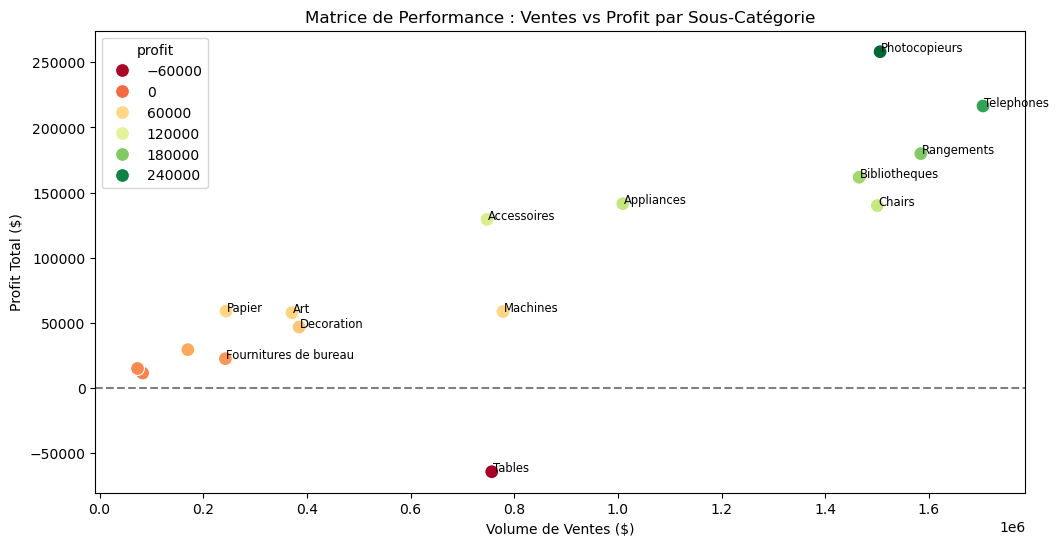

In [77]:
# Agrégation des données par sous-catégorie
# Variables corrigées : sous-categorie, ventes, profit
cat_analysis = df.groupby('sous-categorie')[['ventes', 'profit']].sum().reset_index()

# Visualisation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cat_analysis, x='ventes', y='profit', s=100, hue='profit', palette='RdYlGn')

# Ajout des étiquettes pour les cas extrêmes
for line in range(0, cat_analysis.shape[0]):
    # Seuil arbitraire pour l'affichage : perte ou ventes > 200k
    if cat_analysis.profit[line] < 0 or cat_analysis.ventes[line] > 200000:
        plt.text(cat_analysis.ventes[line]+2000, cat_analysis.profit[line], 
                 cat_analysis['sous-categorie'][line], horizontalalignment='left', size='small', color='black')

plt.axhline(0, color='grey', linestyle='--')
plt.title('Matrice de Performance : Ventes vs Profit par Sous-Catégorie')
plt.xlabel('Volume de Ventes ($)')
plt.ylabel('Profit Total ($)')
plt.show()

## 2. Le "Sweet Spot" des Remises (Discounts)

Les remises boostent les ventes, mais à quel prix ? Cette section analyse le point de bascule où la remise détruit la marge bénéficiaire.

### Objectifs de l'analyse
- Vérifier si les remises élevées sont rentables
- Définir le pourcentage de remise optimal

C:\Users\etudiant\AppData\Local\Temp\ipykernel_20200\1435892413.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='remise', y='profit', label='Profit Moyen', color='red', ci=None)


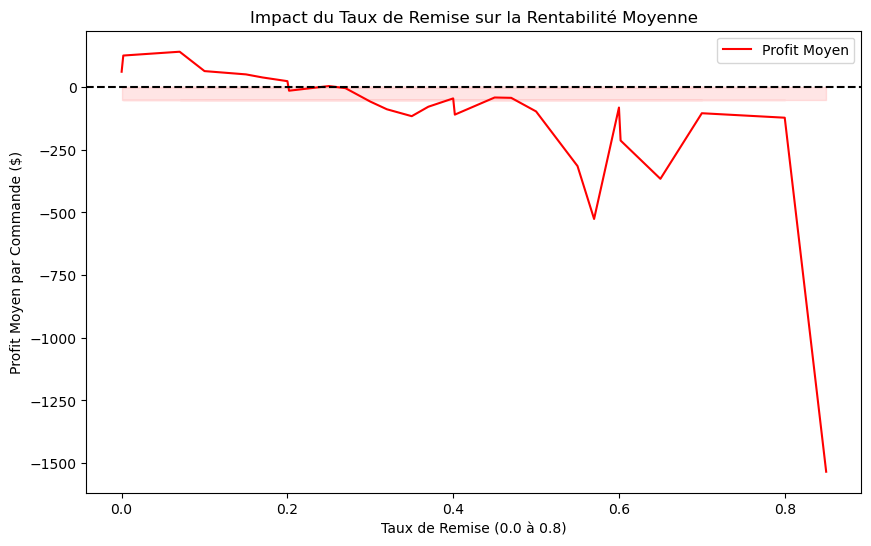

In [78]:
# Visualisation de la relation Remise / Profit
# Variable corrigée : remise, profit
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='remise', y='profit', label='Profit Moyen', color='red', ci=None)
plt.axhline(0, color='black', linestyle='--')

plt.title("Impact du Taux de Remise sur la Rentabilité Moyenne")
plt.xlabel("Taux de Remise (0.0 à 0.8)")
plt.ylabel("Profit Moyen par Commande ($)")
plt.fill_between(df['remise'].unique(), 0, -50, alpha=0.1, color='red') # Zone de danger
plt.show()

## 3. Rentabilité par Segment Client

Qui sont nos meilleurs clients ? Nous comparons les segments (Consumer, Corporate, Home Office) sur la marge réelle dégagée.

### Objectifs de l'analyse
- Identifier le segment le plus lucratif (ROI)
- Adapter les campagnes marketing

C:\Users\etudiant\AppData\Local\Temp\ipykernel_20200\3258190404.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_stats, x='segment_de_marche', y='profit', alpha=0.6, ax=ax1, palette='Blues')


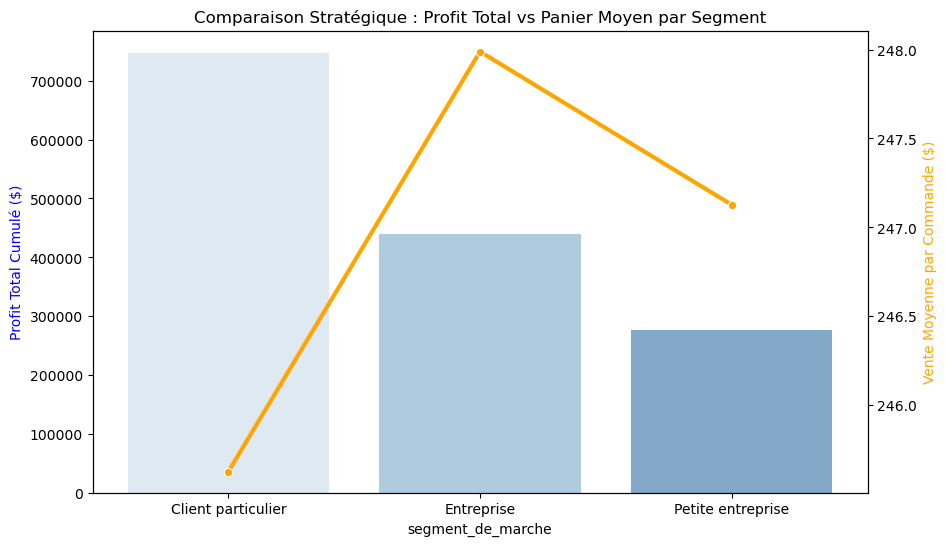

In [79]:
# Analyse par Segment
# Variables corrigées : segment_de_marche, ventes, profit, quantite
segment_stats = df.groupby('segment_de_marche')[['ventes', 'profit', 'quantite']].agg({'ventes':'mean', 'profit':'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart pour le Profit Total
sns.barplot(data=segment_stats, x='segment_de_marche', y='profit', alpha=0.6, ax=ax1, palette='Blues')
ax1.set_ylabel('Profit Total Cumulé ($)', color='blue')

# Line chart pour le Panier Moyen
ax2 = ax1.twinx()
sns.lineplot(data=segment_stats, x='segment_de_marche', y='ventes', marker='o', sort=False, ax=ax2, color='orange', linewidth=3)
ax2.set_ylabel('Vente Moyenne par Commande ($)', color='orange')

plt.title('Comparaison Stratégique : Profit Total vs Panier Moyen par Segment')
plt.show()

## 4. Topologie des Pertes : L'Analyse Régionale

Le chiffre d'affaires global masque souvent des disparités régionales. Nous allons isoler les zones déficitaires.

### Objectifs de l'analyse
- Lister les 10 régions/états qui font perdre de l'argent à NexaStore

C:\Users\etudiant\AppData\Local\Temp\ipykernel_20200\3314844717.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_profit, x='profit', y='etat_/_province', palette='Reds_r')


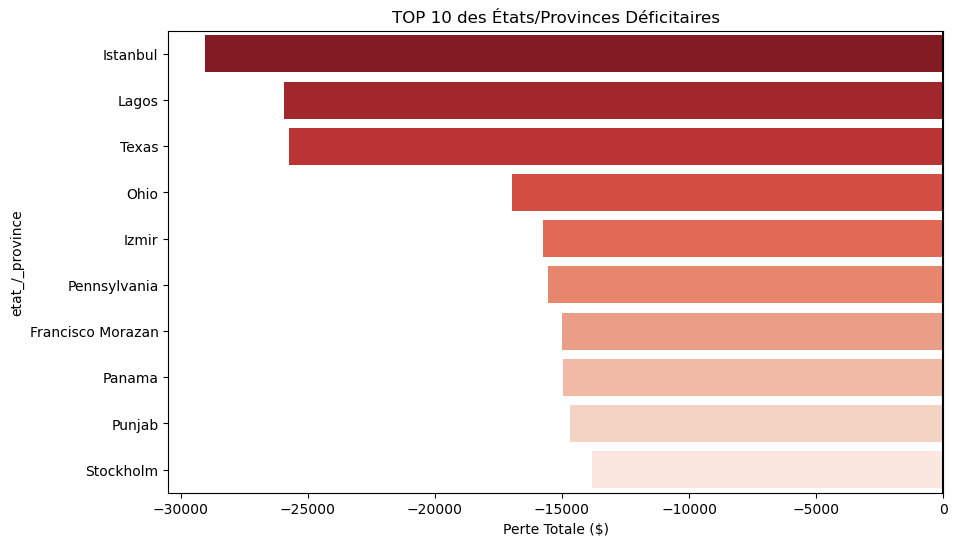

In [80]:
# Identification des États déficitaires
# Variable corrigée : etat_/_province
state_profit = df.groupby('etat_/_province')[['profit', 'ventes']].sum().sort_values('profit').head(10).reset_index()

# Visualisation horizontale
plt.figure(figsize=(10, 6))
sns.barplot(data=state_profit, x='profit', y='etat_/_province', palette='Reds_r')
plt.axvline(0, color='black')
plt.title('TOP 10 des États/Provinces Déficitaires')
plt.xlabel('Perte Totale ($)')
plt.show()

## 5. Efficacité Logistique : Mode d'Expédition vs Marge

Est-ce que l'expédition rapide ("Same Day") justifie son coût ?

### Objectifs de l'analyse
- Déterminer si le "Same Day" est un levier de croissance ou un centre de coût

C:\Users\etudiant\AppData\Local\Temp\ipykernel_20200\322297361.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_mode_stats, x='mode_dexpedition', y='Marge_Pct', palette='viridis')


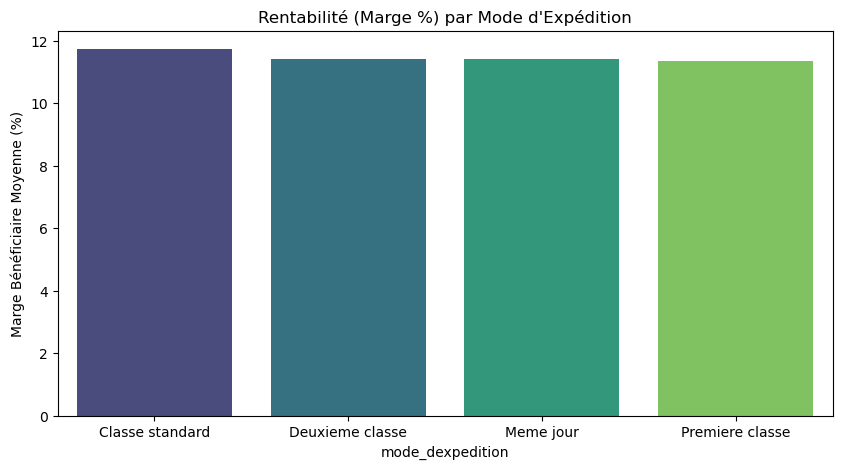

In [81]:
# Calcul de la marge moyenne par mode d'expédition
# Variable corrigée : mode_dexpedition
ship_mode_stats = df.groupby('mode_dexpedition')[['ventes', 'profit']].mean().reset_index()

# Calcul de la marge en %
ship_mode_stats['Marge_Pct'] = (ship_mode_stats['profit'] / ship_mode_stats['ventes']) * 100

# Visualisation
plt.figure(figsize=(10, 5))
sns.barplot(data=ship_mode_stats, x='mode_dexpedition', y='Marge_Pct', palette='viridis')
plt.title('Rentabilité (Marge %) par Mode d\'Expédition')
plt.ylabel('Marge Bénéficiaire Moyenne (%)')
plt.show()

# Génération du visuel html 
- certaine opération de renommage de colonne et de mise en en forme on était mise selon le dataset pour une meilleure visualisation et une meilleure lecture
- L'enrichirent du code **HTML** a étais améliorer via **Claude** afin d'optimisé et améliorer l'expérience visuel

In [82]:
import json
import numpy as np

def generer_dashboard_ultime(df, filename="DashboardNexaStore.html"):
    print("INITIALISATION DU MOTEUR D'EXTRACTION")

    # ==========================================================================================
    # 1. CONFIGURATION DES VARIABLES (SNAKE_CASE STRICT)
    # ==========================================================================================
    # On fige les noms de colonnes 
    c_date     = 'date_de_commande'
    c_ship     = 'mode_dexpedition'
    c_seg      = 'segment_de_marche'
    c_pays     = 'pays'
    c_region   = 'region'
    c_cat      = 'categorie'
    c_subcat   = 'sous-categorie'
    c_prod     = 'nom_du_produit'
    c_ventes   = 'ventes'
    c_profit   = 'profit'
    c_qty      = 'quantite'
    c_remise   = 'remise'
    c_delai    = 'delai_jours'  # J'utilise ta colonne délai
    
    # Sécurisation Dates
    df[c_date] = pd.to_datetime(df[c_date], errors='coerce')

    # ==========================================================================================
    # 2. CALCULS & AGRÉGATIONS (La partie "Data Engineering")
    # ==========================================================================================
    
    print("... Calcul des KPIs Macro")
    # A. KPIs GLOBAUX
    kpi = {
        'ca': df[c_ventes].sum(),
        'profit': df[c_profit].sum(),
        'marge': (df[c_profit].sum() / df[c_ventes].sum() * 100),
        'commandes': len(df),
        'qty': df[c_qty].sum(),
        'panier': df[c_ventes].mean(),
        'remise_avg': df[c_remise].mean() * 100,
        'delai_avg': df[c_delai].mean() if c_delai in df.columns else 0
    }

    print("... Analyse Temporelle")
    # B. TIME SERIES (Mois)
    df_time = df.set_index(c_date).resample('M')[[c_ventes, c_profit, c_qty]].sum().reset_index()
    df_time['Date_Str'] = df_time[c_date].dt.strftime('%Y-%m')
    json_time = df_time.to_json(orient='records')

    print("... Analyse Hiérarchie Produit")
    # C. HIERARCHIE (Catégorie & Sous-Catégorie)
    # Performance par Catégorie
    df_cat = df.groupby(c_cat)[[c_ventes, c_profit]].sum().reset_index()
    json_cat = df_cat.to_json(orient='records')
    
    # Performance par Sous-Catégorie (Barres Horizontales)
    df_sub = df.groupby(c_subcat)[[c_ventes, c_profit]].sum().reset_index().sort_values(c_profit, ascending=False)
    json_sub = df_sub.to_json(orient='records')

    print("... Analyse Clients & Geo")
    # D. SEGMENTS & GEO
    df_seg = df.groupby(c_seg)[[c_ventes]].sum().reset_index()
    json_seg = df_seg.to_json(orient='records')

    df_reg = df.groupby(c_region)[[c_ventes, c_profit]].sum().reset_index()
    json_reg = df_reg.to_json(orient='records')
    
    # Top 10 Pays
    df_pays = df.groupby(c_pays)[[c_ventes]].sum().sort_values(c_ventes, ascending=False).head(10).reset_index()
    json_pays = df_pays.to_json(orient='records')

    print("... Analyse Logistique")
    # E. LOGISTIQUE & DÉLAIS
    # On regarde si le mode d'expédition impacte le délai et le profit
    cols_ship = [c_ventes, c_profit]
    if c_delai in df.columns: cols_ship.append(c_delai)
    
    df_ship = df.groupby(c_ship)[cols_ship].mean().reset_index()
    # On ajoute le volume total pour la taille des bulles ou barres
    df_ship_vol = df.groupby(c_ship)[[c_ventes]].sum().rename(columns={c_ventes:'total_ventes'})
    df_ship = df_ship.merge(df_ship_vol, on=c_ship)
    json_ship = df_ship.to_json(orient='records')

    print("... Analyse Scatter (Produits)")
    # F. SCATTER PLOT (Produits Stars vs Toxiques)
    # On agrège par produit pour ne pas crasher le navigateur avec 10k points
    df_prod_agg = df.groupby(c_prod)[[c_ventes, c_profit]].sum().reset_index()
    # On garde les produits significatifs (> 1000$ ventes ou < -500 profit) pour alléger
    df_prod_filter = df_prod_agg[ (df_prod_agg[c_ventes] > 1000) | (df_prod_agg[c_profit].abs() > 500) ]
    json_scatter = df_prod_filter.to_json(orient='records')

    # Top/Flop Tables
    top_prod = df_prod_agg.sort_values(c_profit, ascending=False).head(5).to_dict(orient='records')
    flop_prod = df_prod_agg.sort_values(c_profit, ascending=True).head(5).to_dict(orient='records')

    # ==========================================================================================
    # 3. GÉNÉRATION HTML
    # ==========================================================================================
    
    html = f"""<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>NexaStore | Master Dashboard</title>
    <script src="https://cdn.jsdelivr.net/npm/chart.js"></script>
    <style>
        @import url('https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;700&family=JetBrains+Mono:wght@400;700&display=swap');
        
        :root {{
            --bg: #0f172a; --panel: #1e293b; --border: #334155; --text-main: #f1f5f9; --text-muted: #94a3b8;
            --accent: #3b82f6; --success: #10b981; --warning: #f59e0b; --danger: #ef4444; --purple: #8b5cf6;
        }}

        * {{ margin: 0; padding: 0; box-sizing: border-box; }}
        body {{ background: var(--bg); color: var(--text-main); font-family: 'Inter', sans-serif; padding-bottom: 60px; }}
        
        /* LAYOUT */
        .wrapper {{ max-width: 1600px; margin: 0 auto; padding: 20px; }}
        header {{ margin-bottom: 30px; border-bottom: 1px solid var(--border); padding-bottom: 20px; display: flex; justify-content: space-between; align-items: end; }}
        h1 {{ font-size: 24px; font-weight: 700; letter-spacing: -0.5px; }}
        h1 span {{ color: var(--accent); }}
        .subtitle {{ color: var(--text-muted); font-size: 14px; margin-top: 5px; }}
        
        .grid {{ display: grid; grid-template-columns: repeat(12, 1fr); gap: 20px; margin-bottom: 20px; }}
        .panel {{ background: var(--panel); border: 1px solid var(--border); border-radius: 12px; padding: 20px; display: flex; flex-direction: column; }}
        
        /* SPANS GRID */
        .col-2 {{ grid-column: span 2; }} .col-3 {{ grid-column: span 3; }} .col-4 {{ grid-column: span 4; }}
        .col-6 {{ grid-column: span 6; }} .col-8 {{ grid-column: span 8; }} .col-9 {{ grid-column: span 9; }} .col-12 {{ grid-column: span 12; }}

        /* TYPOGRAPHY */
        .panel-head {{ font-size: 13px; font-weight: 600; text-transform: uppercase; color: var(--text-muted); margin-bottom: 15px; display: flex; justify-content: space-between; }}
        .kpi-value {{ font-family: 'JetBrains Mono', monospace; font-size: 28px; font-weight: 700; margin-top: 5px; }}
        .kpi-sub {{ font-size: 12px; color: var(--text-muted); margin-top: 5px; }}
        .good {{ color: var(--success); }} .bad {{ color: var(--danger); }}

        /* CHART CONTAINERS */
        .chart-container {{ position: relative; flex-grow: 1; min-height: 200px; }}
        .h-300 {{ min-height: 300px; }}
        .h-400 {{ min-height: 400px; }}

        /* TABLES */
        table {{ width: 100%; border-collapse: collapse; font-size: 12px; }}
        th {{ text-align: left; color: var(--text-muted); padding: 8px 0; border-bottom: 1px solid var(--border); }}
        td {{ padding: 10px 0; border-bottom: 1px solid rgba(255,255,255,0.05); }}
        .mono {{ font-family: 'JetBrains Mono', monospace; }}
        
        /* UTILS */
        .tag {{ padding: 2px 8px; border-radius: 4px; font-size: 10px; font-weight: 700; text-transform: uppercase; }}
        .tag-blue {{ background: rgba(59, 130, 246, 0.2); color: var(--accent); }}
    </style>
</head>
<body>

<div class="wrapper">
    <header>
        <div>
            <h1>NEXASTORE <span>ANALYTICS</span></h1>
            <div class="subtitle">Rapport d'Audit Complet • Logistique, Finance & Produits</div>
        </div>
        <div style="text-align: right; font-size: 12px; color: var(--text-muted);">
            Source: <b>NotebookAnalyctic.ipynb</b><br>
            Date: <script>document.write(new Date().toLocaleDateString())</script>
        </div>
    </header>

    <div class="grid">
        <div class="panel col-2">
            <div class="panel-head">Chiffre d'Affaires</div>
            <div class="kpi-value">{kpi['ca']:,.0f} $</div>
            <div class="kpi-sub">Volume total</div>
        </div>
        <div class="panel col-2">
            <div class="panel-head">Profit Net</div>
            <div class="kpi-value { 'good' if kpi['profit'] > 0 else 'bad' }">{kpi['profit']:,.0f} $</div>
            <div class="kpi-sub">Marge Globale: <span class="mono">{kpi['marge']:.1f}%</span></div>
        </div>
        <div class="panel col-2">
            <div class="panel-head">Total Commandes</div>
            <div class="kpi-value">{kpi['commandes']}</div>
            <div class="kpi-sub">Qté Produits: {kpi['qty']}</div>
        </div>
        <div class="panel col-2">
            <div class="panel-head">Panier Moyen</div>
            <div class="kpi-value">{kpi['panier']:.0f} $</div>
            <div class="kpi-sub">Avg Remise: {kpi['remise_avg']:.1f}%</div>
        </div>
        <div class="panel col-2">
            <div class="panel-head">Délai Expédition</div>
            <div class="kpi-value" style="color:var(--warning)">{kpi['delai_avg']:.1f} j</div>
            <div class="kpi-sub">Moyenne globale</div>
        </div>
        <div class="panel col-2">
            <div class="panel-head">Statut Audit</div>
            <div class="kpi-value good" style="font-size: 20px;">TERMINÉ</div>
            <div class="kpi-sub">Toutes données traitées</div>
        </div>
    </div>

    <div class="grid">
        <div class="panel col-8 h-300">
            <div class="panel-head">
                <span>📈 Évolution Mensuelle (Ventes vs Profit)</span>
                <span class="tag tag-blue">Analyse Temporelle</span>
            </div>
            <div class="chart-container">
                <canvas id="chartTime"></canvas>
            </div>
        </div>
        <div class="panel col-4 h-300">
            <div class="panel-head">Performance par Segment</div>
            <div class="chart-container">
                <canvas id="chartSeg"></canvas>
            </div>
        </div>
    </div>

    <div class="grid">
        <div class="panel col-8 h-400">
            <div class="panel-head">
                <span>🔍 Matrice Rentabilité Sous-Catégories</span>
                <span style="font-size:10px; opacity:0.7">Barres = Profit (Vert/Rouge) • Ligne = Ventes (Blanc)</span>
            </div>
            <div class="chart-container">
                <canvas id="chartSub"></canvas>
            </div>
        </div>
        <div class="panel col-4 h-400">
            <div class="panel-head">Répartition par Catégorie</div>
            <div class="chart-container">
                <canvas id="chartCat"></canvas>
            </div>
        </div>
    </div>

    <div class="grid">
        <div class="panel col-6 h-300">
            <div class="panel-head">🚢 Impact Logistique ({c_ship})</div>
            <div class="chart-container">
                <canvas id="chartShip"></canvas>
            </div>
            <div style="margin-top:10px; font-size:11px; color:#666;">
                Comparaison du Profit Moyen (Barres) et du Délai d'Expédition (Ligne)
            </div>
        </div>
        <div class="panel col-6 h-300">
            <div class="panel-head">🌍 Top 10 Pays (Volume Ventes)</div>
            <div class="chart-container">
                <canvas id="chartPays"></canvas>
            </div>
        </div>
    </div>

    <div class="grid">
        <div class="panel col-12 h-400">
            <div class="panel-head">
                <span>💎 Matrice Produits: Volume vs Profit</span>
                <span class="tag tag-blue">Détection Anomalies</span>
            </div>
            <div class="chart-container">
                <canvas id="chartScatter"></canvas>
            </div>
        </div>
    </div>

    <div class="grid">
        <div class="panel col-6">
            <div class="panel-head" style="color:var(--success)">🏆 Top 5 Produits (Héros)</div>
            <table>
                <thead><tr><th>Nom Produit</th><th class="mono" style="text-align:right">Profit</th></tr></thead>
                <tbody>{''.join([f"<tr><td>{p[c_prod][:50]}...</td><td class='mono good'>+{p[c_profit]:,.0f}$</td></tr>" for p in top_prod])}</tbody>
            </table>
        </div>
        <div class="panel col-6">
            <div class="panel-head" style="color:var(--danger)">⚠️ Top 5 Produits (Pertes)</div>
            <table>
                <thead><tr><th>Nom Produit</th><th class="mono" style="text-align:right">Perte</th></tr></thead>
                <tbody>{''.join([f"<tr><td>{p[c_prod][:50]}...</td><td class='mono bad'>{p[c_profit]:,.0f}$</td></tr>" for p in flop_prod])}</tbody>
            </table>
        </div>
    </div>
</div>

<script>
    Chart.defaults.color = '#94a3b8';
    Chart.defaults.borderColor = '#334155';
    Chart.defaults.font.family = 'Inter';
    
    // 1. CHART TIME
    const dTime = {json_time};
    new Chart(document.getElementById('chartTime'), {{
        type: 'line',
        data: {{
            labels: dTime.map(d => d.Date_Str),
            datasets: [
                {{ label: 'Ventes', data: dTime.map(d => d['{c_ventes}']), borderColor: '#3b82f6', backgroundColor: 'rgba(59,130,246,0.1)', fill:true, tension:0.4, borderWidth:2, pointRadius:0 }},
                {{ label: 'Profit', data: dTime.map(d => d['{c_profit}']), borderColor: '#10b981', borderDash:[5,5], tension:0.4, borderWidth:2, pointRadius:0 }}
            ]
        }},
        options: {{ maintainAspectRatio:false, interaction:{{mode:'index', intersect:false}}, scales:{{x:{{grid:{{display:false}}}}, y:{{grid:{{color:'#1e293b'}}}}}} }}
    }});

    // 2. CHART SEGMENT
    const dSeg = {json_seg};
    new Chart(document.getElementById('chartSeg'), {{
        type: 'doughnut',
        data: {{
            labels: dSeg.map(d => d['{c_seg}']),
            datasets: [{{ data: dSeg.map(d => d['{c_ventes}']), backgroundColor: ['#3b82f6','#8b5cf6','#f59e0b'], borderWidth:0 }}]
        }},
        options: {{ maintainAspectRatio:false, cutout:'70%', plugins:{{legend:{{position:'bottom'}}}} }}
    }});

    // 3. CHART SUBCAT (Mixed)
    const dSub = {json_sub};
    new Chart(document.getElementById('chartSub'), {{
        type: 'bar',
        data: {{
            labels: dSub.map(d => d['{c_subcat}']),
            datasets: [
                {{ label: 'Profit', data: dSub.map(d => d['{c_profit}']), backgroundColor: dSub.map(d => d['{c_profit}']>0?'#10b981':'#ef4444'), order:2 }},
                {{ label: 'Ventes', data: dSub.map(d => d['{c_ventes}']), type:'line', borderColor:'#fff', borderWidth:1, pointRadius:2, yAxisID:'y1', order:1 }}
            ]
        }},
        options: {{ 
            maintainAspectRatio:false, 
            scales:{{ x:{{ticks:{{autoSkip:false, maxRotation:90, font:{{size:10}}}}}}, y:{{title:{{display:true, text:'Profit'}}}}, y1:{{position:'right', grid:{{display:false}}, title:{{display:true, text:'Ventes'}}}} }} 
        }}
    }});

    // 4. CHART CAT (Polar Area for variety)
    const dCat = {json_cat};
    new Chart(document.getElementById('chartCat'), {{
        type: 'polarArea',
        data: {{
            labels: dCat.map(d => d['{c_cat}']),
            datasets: [{{ data: dCat.map(d => d['{c_ventes}']), backgroundColor: ['rgba(59,130,246,0.7)','rgba(139,92,246,0.7)','rgba(16,185,129,0.7)'], borderWidth:1, borderColor:'#1e293b' }}]
        }},
        options: {{ maintainAspectRatio:false, plugins:{{legend:{{position:'bottom'}}}} }}
    }});

    // 5. CHART SHIP (Logistics)
    const dShip = {json_ship};
    new Chart(document.getElementById('chartShip'), {{
        type: 'bar',
        data: {{
            labels: dShip.map(d => d['{c_ship}']),
            datasets: [
                {{ label: 'Profit Moyen ($)', data: dShip.map(d => d['{c_profit}']), backgroundColor: '#8b5cf6', yAxisID:'y' }},
                {{ label: 'Délai Moyen (Jours)', data: dShip.map(d => d['{c_delai}']), type:'line', borderColor:'#f59e0b', borderWidth:2, pointStyle:'circle', pointRadius:5, yAxisID:'y1' }}
            ]
        }},
        options: {{ maintainAspectRatio:false, scales:{{ y:{{title:{{display:true, text:'Profit Moyen'}}}}, y1:{{position:'right', title:{{display:true, text:'Délai (Jours)'}}, grid:{{display:false}}}} }} }}
    }});

    // 6. CHART PAYS
    const dPays = {json_pays};
    new Chart(document.getElementById('chartPays'), {{
        type: 'bar',
        indexAxis: 'y',
        data: {{
            labels: dPays.map(d => d['{c_pays}']),
            datasets: [{{ label: 'Ventes', data: dPays.map(d => d['{c_ventes}']), backgroundColor: '#3b82f6', borderRadius:4 }}]
        }},
        options: {{ maintainAspectRatio:false, scales:{{ x:{{grid:{{color:'#1e293b'}}}}, y:{{grid:{{display:false}}}} }} }}
    }});

    // 7. CHART SCATTER (Produits)
    const dScat = {json_scatter};
    new Chart(document.getElementById('chartScatter'), {{
        type: 'scatter',
        data: {{
            datasets: [{{
                label: 'Produits',
                data: dScat.map(d => ({{x: d['{c_ventes}'], y: d['{c_profit}']}})),
                backgroundColor: dScat.map(d => d['{c_profit}']>0 ? 'rgba(16,185,129,0.6)' : 'rgba(239,68,68,0.6)'),
                borderColor: 'transparent',
                pointRadius: 4,
                pointHoverRadius: 6
            }}]
        }},
        options: {{
            maintainAspectRatio:false,
            scales: {{
                x: {{ title: {{display:true, text:'Volume de Ventes ($)'}}, type:'logarithmic' }},
                y: {{ title: {{display:true, text:'Profit / Perte ($)'}} }}
            }},
            plugins: {{ tooltip: {{ callbacks: {{ label: (ctx) => `Ventes: ${{ctx.raw.x.toFixed(0)}}$, Profit: ${{ctx.raw.y.toFixed(0)}}$` }} }} }}
        }}
    }});
</script>
</body>
</html>
    """
    
    with open(filename, "w", encoding="utf-8") as f:
        f.write(html)
    print(f"✅ Dashboard ULTIME généré : {filename}")

# Lancer la machine
generer_dashboard_ultime(df)

INITIALISATION DU MOTEUR D'EXTRACTION
... Calcul des KPIs Macro
... Analyse Temporelle


C:\Users\etudiant\AppData\Local\Temp\ipykernel_20200\4168785508.py:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_time = df.set_index(c_date).resample('M')[[c_ventes, c_profit, c_qty]].sum().reset_index()


... Analyse Hiérarchie Produit
... Analyse Clients & Geo
... Analyse Logistique
... Analyse Scatter (Produits)
✅ Dashboard ULTIME généré : DashboardNexaStore.html
